# Isolate top 100 facilities per release category

In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
import folium

import warnings
warnings.simplefilter(action='ignore')

In [131]:
tri = gpd.read_file('data/TRI-facilities.geojson')

In [68]:
tri.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
0,00608DCRBNRD3KM,2018,IDI CARIBE INC,PR3 KM 151.8 AGUIRRE,SALINAS,SALINAS,PR,751,,,17.97278,-66.23194,NO,Chemicals,"ZINC COMPOUNDS, STYRENE",,nan,nan,nan,nan,nan,nan,nan,0.00000,13143.38000,0.00000,0.00000,13143.38000,7.15000,13150.53000,nan,nan,nan,nan,nan,nan,nan,0.00000,13143.00000,0.00000,0.00000,13143.00000,0.00000,13143.00000,POINT (-66.23194 17.97278)
1,0060WHPNTRCARR1,2018,HP INTERNATIONAL TRADING BV (PUERTO RICO BRANC...,"CARR 110, KM. 5.1",AGUADILLA,AGUADILLA,PR,603,,,18.45647,-67.13655,NO,Chemicals,CERTAIN GLYCOL ETHERS,HP INC,nan,nan,nan,nan,nan,nan,nan,0.00000,181.40000,0.00000,0.00000,181.40000,0.00000,181.40000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-67.13655 18.45647)
2,00610BXTRHROAD4,2018,EDWARDS LIFESCIENCES TECHNOLOGY SARL,STATE RD 402 KM 1.4 N LAS MARIAS IND US TRIAL ...,ANASCO,ANASCO,PR,610,,,18.29298,-67.13682,NO,Miscellaneous Manufacturing,"ETHYLENE OXIDE, ETHYLENE GLYCOL",EDWARDS LIFESCIENCES LLC,nan,nan,nan,nan,nan,nan,nan,0.00000,580.00000,0.00000,0.00000,580.00000,0.00000,580.00000,nan,nan,nan,nan,nan,nan,nan,0.00000,580.00000,0.00000,0.00000,580.00000,0.00000,580.00000,POINT (-67.13682 18.29298)
3,00610CRBGNCARR4,2018,GE INTERNATIONAL OF PR LLC,STATE RD 402 KM 1.5 INDUSTRIAL ZONE,ANASCO,ANASCO,PR,610,,,18.29244,-67.14019,NO,Electrical Equipment,LEAD,GENERAL ELECTRIC CO (GE CO),nan,nan,nan,nan,nan,nan,nan,0.00000,0.20000,0.00000,0.00000,0.20000,1.00000,1.20000,0.00000,0.20000,0.00000,0.00000,0.20000,1.00000,1.20000,0.00000,0.20000,0.00000,0.00000,0.20000,1.00000,1.20000,POINT (-67.14019 18.29244)
4,00612PRPCMPR681,2018,PREPA-CAMBALACHE COMBUSTION TURBINE PLANT,PR-681 KM 0.5,ARECIBO,ARECIBO,PR,612,,,18.47110,-66.69940,NO,Electric Utilities,"NAPHTHALENE, POLYCYCLIC AROMATIC COMPOUNDS",PUERTO RICO ELECTRIC POWER AUTHORITY,nan,nan,nan,nan,nan,nan,nan,0.00000,42.20000,0.00000,0.00000,42.20000,1.86120,44.06120,0.00000,42.20000,0.00000,0.00000,42.20000,1.86120,44.06120,0.00000,42.20000,0.00000,0.00000,42.20000,1.86120,44.06120,POINT (-66.69940 18.47110)


In [69]:
# view all tri attributes
list(tri.columns)

['TRIFD',
 'YEAR',
 'FACILITY NAME',
 'STREET ADDRESS',
 'CITY',
 'COUNTY',
 'ST',
 'ZIP',
 'BIA',
 'TRIBE',
 'LATITUDE',
 'LONGITUDE',
 'FEDERAL FACILITY',
 'INDUSTRY SECTOR',
 'CHEMICAL',
 'PARENT CO NAME',
 'WATER_RELEASE_GRAMS',
 'AIR_RELEASE_GRAMS',
 'LAND_RELEASE_GRAMS',
 'LAND_RELEASE_EXCLUDED_GRAMS',
 'ON_SITE_RELEASE_TOTAL_GRAMS',
 'OFF_SITE_RELEASE_TOTAL_GRAMS',
 'TOTAL_RELEASES_GRAMS',
 'WATER_RELEASE_LBS',
 'AIR_RELEASE_LBS',
 'LAND_RELEASE_LBS',
 'LAND_RELEASE_EXCLUDED_LBS',
 'ON_SITE_RELEASE_TOTAL_LBS',
 'OFF_SITE_RELEASE_TOTAL_LBS',
 'TOTAL_RELEASES_LBS',
 'WATER_RELEASE_PBTs',
 'AIR_RELEASE_PBTs',
 'LAND_RELEASE_PBTs',
 'LAND_RELEASE_EXCLUDED_PBTs',
 'ON_SITE_RELEASE_TOTAL_PBTs',
 'OFF_SITE_RELEASE_TOTAL_PBTs',
 'TOTAL_RELEASES_PBTs',
 'WATER_RELEASE_CARCINOGEN',
 'AIR_RELEASE_CARCINOGEN',
 'LAND_RELEASE_CARCINOGEN',
 'LAND_RELEASE_EXCLUDED_CARCINOGEN',
 'ON_SITE_RELEASE_TOTAL_CARCINOGEN',
 'OFF_SITE_RELEASE_TOTAL_CARCINOGEN',
 'TOTAL_RELEASES_CARCINOGEN',
 'geometry']

<function print>

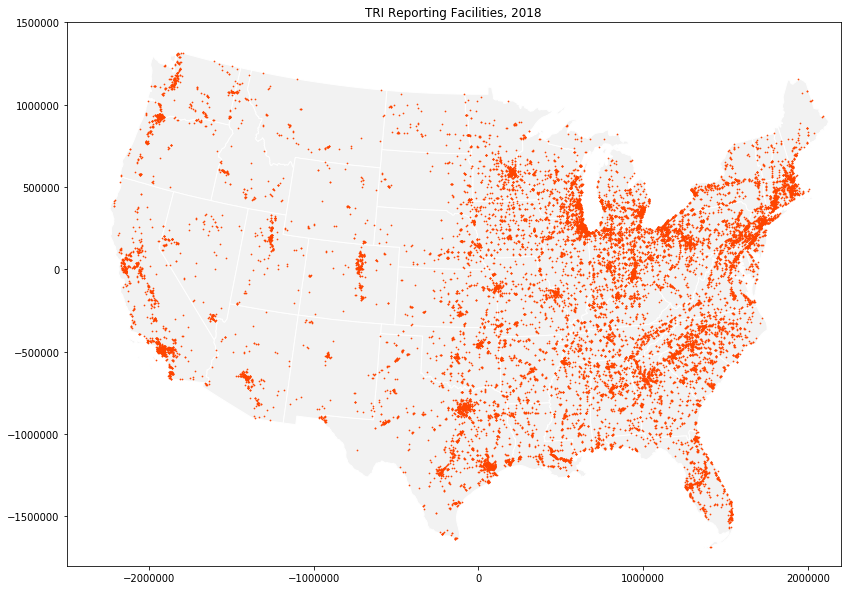

In [70]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_equal = tri.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_equal.plot(ax=ax, color='orangered', zorder=1, markersize=.5);



ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='TRI Reporting Facilities, 2018');

print

### Find top facilities releasing the most non-dioxin carcinogens

In [185]:
tri_total_carcinogens = tri.sort_values(by=['ON_SITE_RELEASE_TOTAL_CARCINOGEN'], ascending=False).head(100)
tri_total_carcinogens.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
13989,60436LRWYR21233,2018,LARAWAY RECYCLING & DISPOSAL FACILITY,21233 W LARAWAY RD,JOLIET,WILL,IL,60436,,,41.47954,-88.12525,NO,Hazardous Waste,"BENZO(G,H,I)PERYLENE, MANGANESE, VANADIUM (EXC...",WASTE MANAGEMENT INC,nan,nan,nan,nan,nan,nan,nan,64.30040,0.00000,12337953.09000,12337953.09000,12338017.39040,0.00000,12338017.39040,0.00040,0.00000,48692.74000,48692.74000,48692.74040,0.00000,48692.74040,0.00000,0.00000,12166814.73000,12166814.73000,12166814.73000,0.00000,12166814.73000,POINT (-88.12525 41.47954)
15721,70070MNSNTRIVER,2018,MONSANTO LULING,12501 RIVER RD,LULING,ST CHARLES PARISH,LA,70070,,,29.92444,-90.35222,NO,Chemicals,"NICKEL, DIETHANOLAMINE, NITRILOTRIACETIC ACID,...",BAYER CORP,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,122750.00000,45903.00000,18399050.00000,0.00000,18567703.00000,0.00000,18567703.00000,nan,nan,nan,nan,nan,nan,nan,4210.00000,14900.00000,11018450.00000,0.00000,11037560.00000,0.00000,11037560.00000,POINT (-90.35222 29.92444)
19530,89003SCLGYHWY95,2018,US ECOLOGY NEVADA INC,12 MILES S OF BEATTY ON HWY 95,BEATTY,NYE,NV,89003,,,36.76770,-116.69279,NO,Hazardous Waste,"MANGANESE COMPOUNDS, PENDIMETHALIN, NITRILOTRI...",US ECOLOGY INC,nan,nan,nan,nan,nan,nan,nan,0.00000,824.81100,13461840.50000,12729.00000,13462665.31100,2419.00000,13465084.31100,0.00000,247.74100,4069300.50000,0.00000,4069548.24100,154.00000,4069702.24100,0.00000,419.59000,6830784.00000,0.00000,6831203.59000,1677.00000,6832880.59000,POINT (-116.69279 36.76770)
11527,4981WGLMNL4547C,2018,EAGLE MINE LLC-HUMBOLDT MILL,4547 COUNTY RD 601,CHAMPION,MARQUETTE,MI,49814,,,46.48541,-87.90505,NO,Metal Mining,"COBALT and COBALT COMPOUNDS, NICKEL and NICK...",,nan,nan,nan,nan,nan,nan,nan,14.63000,99.50000,8336014.00000,8336014.00000,8336128.13000,215.59000,8336343.72000,1.43000,0.00000,26014.00000,26014.00000,26015.43000,0.39000,26015.82000,11.30000,58.00000,6700000.00000,6700000.00000,6700069.30000,186.00000,6700255.30000,POINT (-87.90505 46.48541)
18180,77979BPCHMTEXAS,2018,INEOS NITRILES USA LLC GREEN LAKE PLANT,TEXAS HWY 185,PORT LAVACA,CALHOUN,TX,77979,,,28.57096,-96.83341,NO,Chemicals,"HYDROQUINONE, ACETAMIDE, ACRYLIC ACID, ACROLEI...",INEOS USA LLC,nan,nan,nan,nan,nan,nan,nan,16208.00000,143586.00000,21259036.00000,0.00000,21418830.00000,1031868.00000,22450698.00000,nan,nan,nan,nan,nan,nan,nan,0.00000,21933.00000,6586596.00000,0.00000,6608529.00000,33298.00000,6641827.00000,POINT (-96.83341 28.57096)


<function print>

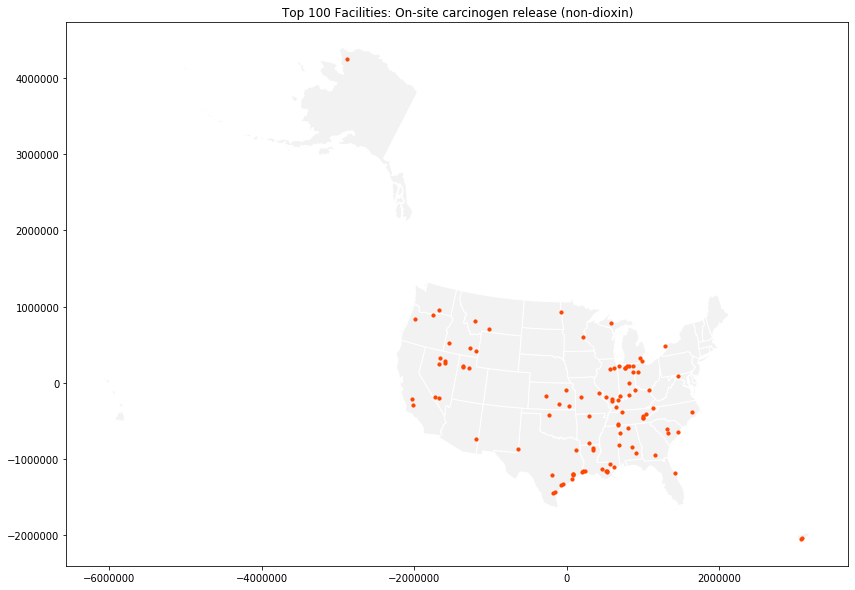

In [164]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_total_carcinogens_equal = tri_total_carcinogens.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_total_carcinogens_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: On-site carcinogen release (non-dioxin)');

print

In [163]:
# plot heatmap
m = folium.Map(location=[37, -102], zoom_start=4)

from folium.plugins import HeatMap

max_amount = float(tri_total_carcinogens['ON_SITE_RELEASE_TOTAL_CARCINOGEN'].max())

hm_wide = HeatMap( list(zip(tri_total_carcinogens.LATITUDE.values, tri_total_carcinogens.LONGITUDE.values, tri_total_carcinogens.ON_SITE_RELEASE_TOTAL_CARCINOGEN.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

m.add_child(hm_wide)

m

### Find top facilities based on total releases in pounds (non-dioxin)

In [186]:
tri_total_lbs = tri.sort_values(by=['ON_SITE_RELEASE_TOTAL_LBS'], ascending=False).head(100)
tri_total_lbs.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
21553,99752RDDGP90MIL,2018,RED DOG OPERATIONS,90 MILES N OF KOTZEBUE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,99752,,,68.06151,-162.85549,NO,Metal Mining,"LEAD COMPOUNDS, 1,2,4-TRIMETHYLBENZENE, METHAN...",TECK AMERICAN INC,0.00000,0.82870,0.00145,0.00145,0.83015,0.00000,0.83015,6335.80200,212962.44000,885463576.00000,885463576.00000,885682874.24200,0.91000,885682875.15200,2.48200,18234.49000,490874429.00000,490874429.00000,490892665.97200,0.86000,490892666.83200,3.85000,452.06000,2277576.00000,2277576.00000,2278031.91000,0.02000,2278031.93000,POINT (-162.85549 68.06151)
19008,84006KNNCT12300,2018,KENNECOTT UTAH COPPER MINE CONCENTRATORS & POW...,8362 WEST 10200 SOUTH,BINGHAM CANYON,SALT LAKE,UT,84006,,,40.51667,-112.15000,NO,Metal Mining,"LEAD COMPOUNDS, DIOXIN AND DIOXIN-LIKE COMPOUN...",RIO TINTO AMERICA INC,0.00000,0.30287,0.00000,0.00000,0.30287,0.00000,0.30287,3549.00000,5378.96000,229193581.00000,229193581.00000,229202508.96000,27.90000,229202536.86000,21.00000,812.27000,179097806.00000,179097806.00000,179098639.27000,0.00000,179098639.27000,476.00000,83.64000,12924.00000,12924.00000,13483.64000,0.00000,13483.64000,POINT (-112.15000 40.51667)
19611,89414NWMNT35MIL,2018,NEWMONT GOLDCORP TWIN CREEKS MINE,35 MILES NE OF GOLCONDA,GOLCONDA,HUMBOLDT,NV,89414,,,41.25349,-117.16764,NO,Metal Mining,"NICKEL COMPOUNDS, ARSENIC COMPOUNDS, MERCURY C...",NEWMONT GOLDCORP,nan,nan,nan,nan,nan,nan,nan,26530.00000,63896.30000,99685043.70000,99685043.70000,99775470.00000,225.20000,99775695.20000,0.00000,469.30000,5658139.70000,5658139.70000,5658609.00000,225.20000,5658834.20000,163.00000,19.00000,590172.00000,590172.00000,590354.00000,0.00000,590354.00000,POINT (-117.16764 41.25349)
19395,85539BHPCPHWY60,2018,PINTO VALLEY MINE,2911 N FOREST SERVICE RD 287,MIAMI,GILA,AZ,85539,,,33.41745,-110.98421,NO,Metal Mining,"COPPER and COPPER COMPOUNDS, ZINC COMPOUNDS, ...",,nan,nan,nan,nan,nan,nan,nan,0.00000,20121.39816,97135884.00000,97135884.00000,97156005.39816,154.00000,97156159.39816,0.00000,813.69816,10162351.00000,10162351.00000,10163164.69816,154.00000,10163318.69816,0.00000,7398.00000,0.00000,0.00000,7398.00000,0.00000,7398.00000,POINT (-110.98421 33.41745)
21555,99801KNNCT13401,2018,HECLA GREENS CREEK MINING CO,13401 GLACIER HWY,JUNEAU,JUNEAU BOROUGH,AK,99801,,,58.08180,-134.64121,NO,Metal Mining,"1,2,4-TRIMETHYLBENZENE, MANGANESE, CADMIUM COM...",HECLA MINING CO,nan,nan,nan,nan,nan,nan,nan,363.00000,18283.00000,55570951.00000,55570951.00000,55589597.00000,9.00000,55589606.00000,110.00000,109.00000,7031598.00000,7031598.00000,7031817.00000,0.00000,7031817.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,POINT (-134.64121 58.08180)


<function print>

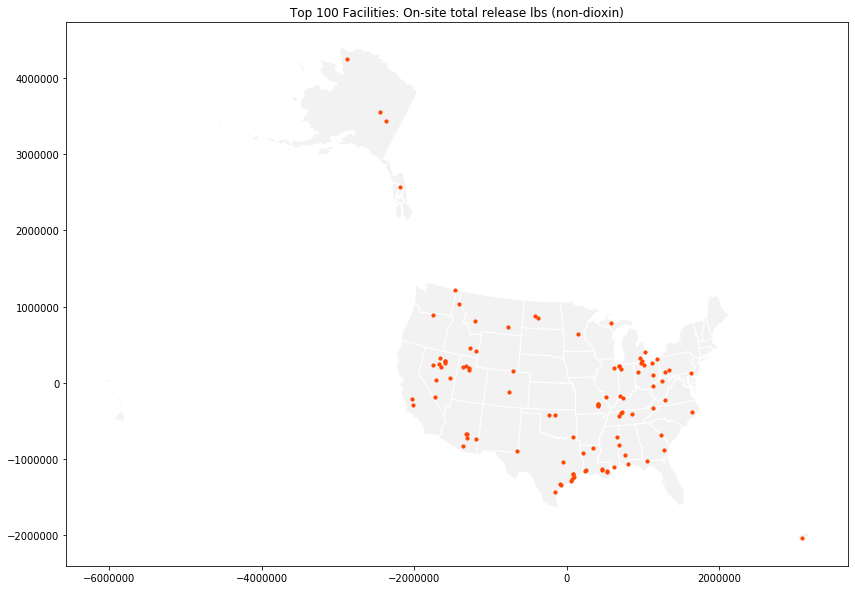

In [166]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_total_lbs_equal = tri_total_lbs.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_total_lbs_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: On-site total release lbs (non-dioxin)');

print

In [167]:
# plot heatmap
m = folium.Map(location=[37, -102], zoom_start=4)

max_amount = float(tri_total_lbs['ON_SITE_RELEASE_TOTAL_LBS'].max())

hm_wide = HeatMap( list(zip(tri_total_lbs.LATITUDE.values, tri_total_lbs.LONGITUDE.values, tri_total_lbs.ON_SITE_RELEASE_TOTAL_LBS.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

m.add_child(hm_wide)

m

### Find top facilities based on total release of PBTs (persistant bioaccumulative toxic chemical) in pounds

In [187]:
tri_total_pbt = tri.sort_values(by=['ON_SITE_RELEASE_TOTAL_PBTs'], ascending=False).head(100)
tri_total_pbt.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
21553,99752RDDGP90MIL,2018,RED DOG OPERATIONS,90 MILES N OF KOTZEBUE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,99752,,,68.06151,-162.85549,NO,Metal Mining,"LEAD COMPOUNDS, 1,2,4-TRIMETHYLBENZENE, METHAN...",TECK AMERICAN INC,0.00000,0.82870,0.00145,0.00145,0.83015,0.00000,0.83015,6335.80200,212962.44000,885463576.00000,885463576.00000,885682874.24200,0.91000,885682875.15200,2.48200,18234.49000,490874429.00000,490874429.00000,490892665.97200,0.86000,490892666.83200,3.85000,452.06000,2277576.00000,2277576.00000,2278031.91000,0.02000,2278031.93000,POINT (-162.85549 68.06151)
19008,84006KNNCT12300,2018,KENNECOTT UTAH COPPER MINE CONCENTRATORS & POW...,8362 WEST 10200 SOUTH,BINGHAM CANYON,SALT LAKE,UT,84006,,,40.51667,-112.15000,NO,Metal Mining,"LEAD COMPOUNDS, DIOXIN AND DIOXIN-LIKE COMPOUN...",RIO TINTO AMERICA INC,0.00000,0.30287,0.00000,0.00000,0.30287,0.00000,0.30287,3549.00000,5378.96000,229193581.00000,229193581.00000,229202508.96000,27.90000,229202536.86000,21.00000,812.27000,179097806.00000,179097806.00000,179098639.27000,0.00000,179098639.27000,476.00000,83.64000,12924.00000,12924.00000,13483.64000,0.00000,13483.64000,POINT (-112.15000 40.51667)
19395,85539BHPCPHWY60,2018,PINTO VALLEY MINE,2911 N FOREST SERVICE RD 287,MIAMI,GILA,AZ,85539,,,33.41745,-110.98421,NO,Metal Mining,"COPPER and COPPER COMPOUNDS, ZINC COMPOUNDS, ...",,nan,nan,nan,nan,nan,nan,nan,0.00000,20121.39816,97135884.00000,97135884.00000,97156005.39816,154.00000,97156159.39816,0.00000,813.69816,10162351.00000,10162351.00000,10163164.69816,154.00000,10163318.69816,0.00000,7398.00000,0.00000,0.00000,7398.00000,0.00000,7398.00000,POINT (-110.98421 33.41745)
19660,89821CRTZGSTARA,2018,"BARRICK CORTEZ, INC",I-80 E,CRESCENT VALLEY,EUREKA,NV,89821,,,40.22240,-116.66570,NO,Metal Mining,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,BARRICK GOLD CORP,nan,nan,nan,nan,nan,nan,nan,0.00000,35708.80000,40234577.00000,40234577.00000,40270285.80000,4588.08000,40274873.88000,0.00000,569.80000,9786644.00000,9786644.00000,9787213.80000,4581.51000,9791795.31000,0.00000,973.00000,154790.00000,154790.00000,155763.00000,0.48000,155763.48000,POINT (-116.66570 40.22240)
19659,89820BTTLMCOPPE,2018,NEWMONT GOLDCORP COPPER CANYON FACILITY,12 MI SE OF BATTLE MOUNTAIN COPPER CANYON FACI...,BATTLE MOUNTAIN,LANDER,NV,89820,,,40.50066,-117.10615,NO,Metal Mining,", BERYLLIUM COMPOUNDS, NITRATE COMPOUNDS, LEAD...",NEWMONT GOLDCORP,nan,nan,nan,nan,nan,nan,nan,0.00000,22263.80000,54306980.60000,54306980.60000,54329244.40000,2221.50000,54331465.90000,0.00000,304.80000,8647073.60000,8647073.60000,8647378.40000,2203.50000,8649581.90000,0.00000,14.00000,1188015.00000,1188015.00000,1188029.00000,0.00000,1188029.00000,POINT (-117.10615 40.50066)


<function print>

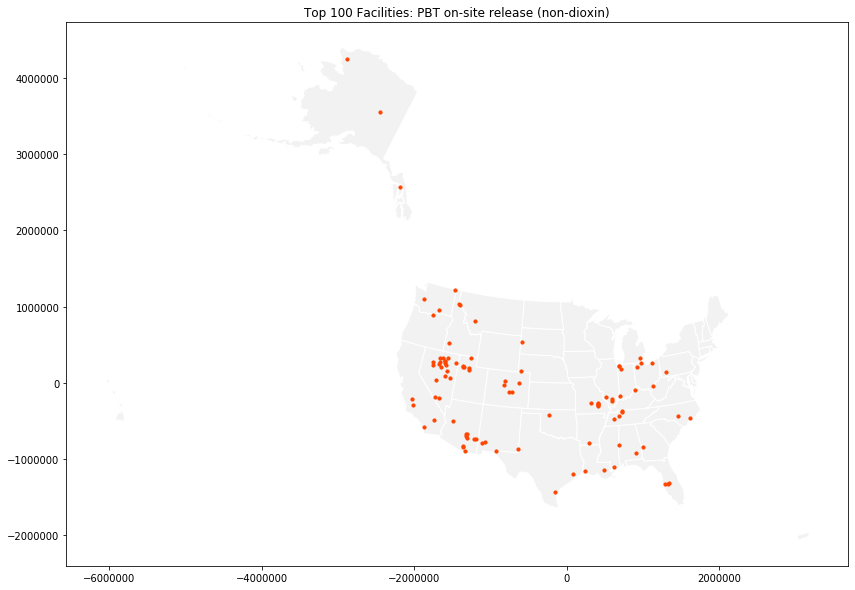

In [169]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_total_pbt_equal = tri_total_pbt.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_total_pbt_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: PBT on-site release (non-dioxin)');

print

In [170]:
# plot heatmap
m = folium.Map(location=[37, -102], zoom_start=4)

max_amount = float(tri_total_pbt['ON_SITE_RELEASE_TOTAL_PBTs'].max())

hm_wide = HeatMap( list(zip(tri_total_pbt.LATITUDE.values, tri_total_pbt.LONGITUDE.values, tri_total_pbt.ON_SITE_RELEASE_TOTAL_PBTs.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

m.add_child(hm_wide)

m

### Find top facilities based on total lbs released into waterways

In [188]:
# find top 10 facilities
tri_total_water = tri.sort_values(by=['WATER_RELEASE_LBS'], ascending=False).head(100)
tri_total_water.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
10695,47635KSTLC6500N,2018,AK STEEL CORP (ROCKPORT WORKS ),6500 NORTH U.S. 231,ROCKPORT,SPENCER,IN,47635,,,37.98490,-87.02590,NO,Primary Metals,"HYDROGEN FLUORIDE, CHROMIUM, NITRIC ACID, NITR...",AK STEEL HOLDING CORP,nan,nan,nan,nan,nan,nan,nan,12833795.00000,9801.00000,0.00000,0.00000,12843596.00000,1333875.00000,14177471.00000,53.00000,0.00000,0.00000,0.00000,53.00000,20280.00000,20333.00000,241.00000,0.00000,0.00000,0.00000,241.00000,327313.00000,327554.00000,POINT (-87.02590 37.98490)
3703,24141SDDSRPOBOX,2018,US ARMY RADFORD ARMY AMMUNITION PLANT,RT 114 RADFORD ARMY AMMUNITION PLANT,RADFORD,MONTGOMERY,VA,24141,,,37.18056,-80.54111,YES,Other,"AMMONIA, NITROGLYCERIN, MERCURY, NITRATE COMPO...",US DEPARTMENT OF DEFENSE,0.00000,0.01126,0.00000,0.00000,0.01126,0.00000,0.01126,7356374.60000,77793.00000,0.00000,0.00000,7434167.60000,8075.11000,7442242.71000,128.70000,1645.00000,0.00000,0.00000,1773.70000,7823.51000,9597.21000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,2.00000,POINT (-80.54111 37.18056)
3159,19706TXCDL2000W,2018,DELAWARE CITY REFINERY,4550 WRANGLE HILL RD,DELAWARE CITY,NEW CASTLE,DE,19706,,,39.58861,-75.63555,NO,Petroleum,"DIOXIN AND DIOXIN-LIKE COMPOUNDS, CRESOL (MIXE...",PBF ENERGY INC,0.00000,0.57500,0.00000,0.00000,0.57500,0.00000,0.57500,5104867.24000,560363.31000,76.00000,76.00000,5665306.55000,78762.43500,5744068.98500,12.48000,445.21000,0.00000,0.00000,457.69000,27.15550,484.84550,248.60000,9535.68000,76.00000,76.00000,9860.28000,78511.66250,88371.94250,POINT (-75.63555 39.58861)
8858,43812CSHCTSTATE,2018,AK STEEL CORP COSHOCTON WORKS,17400 STATE RT 16,COSHOCTON,COSHOCTON,OH,43812,,,40.20669,-81.88549,NO,Primary Metals,"MANGANESE and MANGANESE COMPOUNDS, NICKEL an...",AK STEEL HOLDING CORP,nan,nan,nan,nan,nan,nan,nan,4486529.00500,19494.91800,0.00000,0.00000,4506023.92300,360869.34710,4866893.27010,0.00500,0.59800,0.00000,0.00000,0.60300,245.64710,246.25010,659.00000,156.80000,0.00000,0.00000,815.80000,101792.70000,102608.50000,POINT (-81.88549 40.20669)
17974,77541BSFCR602CO,2018,BASF CORP - FREEPORT SITE,602 COPPER RD,FREEPORT,BRAZORIA,TX,77541,,,29.00208,-95.39978,NO,Chemicals,"N-BUTYL ALCOHOL, NITRATE COMPOUNDS, PHTHALIC A...",BASF CORP,0.00000,0.00470,0.00000,0.00000,0.00470,0.00000,0.00470,3086678.00000,113873.00000,1305255.00000,0.00000,4505806.00000,1574826.00000,6080632.00000,nan,nan,nan,nan,nan,nan,nan,0.00000,4126.00000,400.00000,0.00000,4526.00000,75525.00000,80051.00000,POINT (-95.39978 29.00208)


<function print>

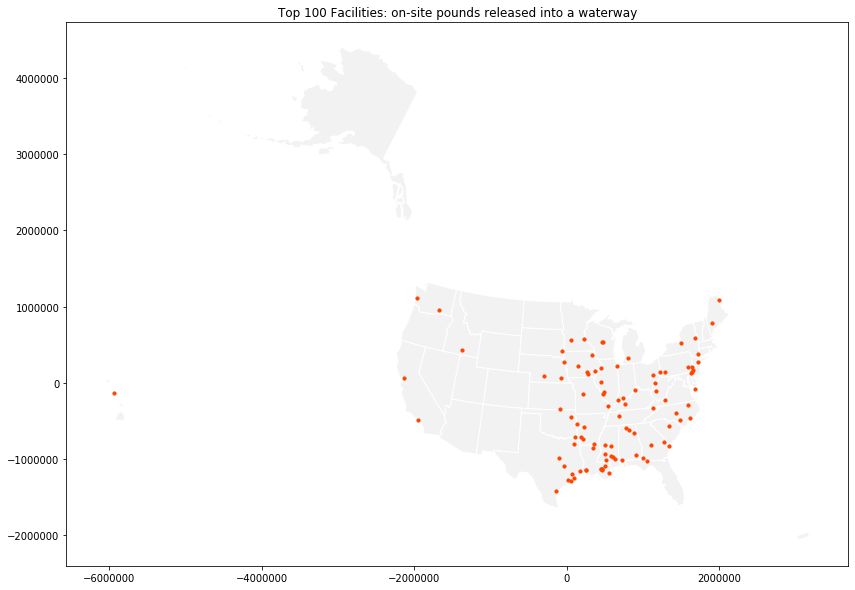

In [172]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_total_water_equal = tri_total_water.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_total_water_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: on-site pounds released into a waterway');

print

In [173]:
# plot heatmap
m = folium.Map(location=[37, -102], zoom_start=4)

max_amount = float(tri_total_water['WATER_RELEASE_LBS'].max())

hm_wide = HeatMap( list(zip(tri_total_water.LATITUDE.values, tri_total_water.LONGITUDE.values, tri_total_water.WATER_RELEASE_LBS.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

m.add_child(hm_wide)

m

### Find top facilities based on total grams of dioxins released

In [189]:
tri_total_dioxins = tri.sort_values(by=['ON_SITE_RELEASE_TOTAL_GRAMS'], ascending=False).head(100)
tri_total_dioxins.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
19054,84074MXMGNROWLE,2018,US MAGNESIUM LLC,12819 N SKULL VALLEY RD,GRANTSVILLE,TOOELE,UT,84029,,,40.91558,-112.73425,NO,Primary Metals,"CHLORINE, DIOXIN AND DIOXIN-LIKE COMPOUNDS, HE...",THE RENCO GROUP INC,0.00000,57.04750,14001.12900,14001.12900,14058.17650,520.00090,14578.17740,0.00000,4997887.44286,2847.68300,2847.68300,5000735.12586,2.97300,5000738.09886,0.00000,111.54286,2847.68300,2847.68300,2959.22586,2.97300,2962.19886,0.00000,50.20286,2509.74300,2509.74300,2559.94586,1.38000,2561.32586,POINT (-112.73425 40.91558)
17988,77541THDWCBUILD,2018,DOW CHEMICAL CO FREEPORT FACILITY,2301 N BRAZOSPORT BLVD,FREEPORT,BRAZORIA,TX,775413257,,,28.97920,-95.35490,NO,Chemicals,"BARIUM COMPOUNDS, CYANIDE COMPOUNDS, DICHLOROM...",THE DOW CHEMICAL CO,885.31200,1.42600,6549.91000,4762.06300,7436.64800,0.00000,7436.64800,180227.97000,886792.16000,60646.38000,59088.03000,1127666.51000,2893.00000,1130559.51000,26.97000,112.16000,2638.38000,2185.03000,2777.51000,610.00000,3387.51000,40848.92000,87335.55000,2128.22000,1867.41000,130312.69000,0.00000,130312.69000,POINT (-95.35490 28.97920)
18311,78380TXSCLPETRO,2018,US ECOLOGY TEXAS INC,3277 COUNTY RD 69,ROBSTOWN,NUECES,TX,78380,,,27.73076,-97.65202,NO,Hazardous Waste,"NITRIC ACID, N-METHYL-2-PYRROLIDONE, BENZENE, ...",US ECOLOGY INC,0.00000,0.00000,2887.14768,0.00000,2887.14768,0.00000,2887.14768,51.27300,23415.15610,7406388.60029,0.00000,7429855.02939,529705.72000,7959560.74939,0.42900,116.59010,720688.48000,0.00000,720805.49910,30225.86000,751031.35910,6.64600,10310.30910,1619268.40000,0.00000,1629585.35510,45330.65000,1674916.00510,POINT (-97.65202 27.73076)
7310,37134DPNTJ1DUPO,2018,CHEMOURS JOHNSONVILLE PLANT,1 DU PONT RD,NEW JOHNSONVILLE,HUMPHREYS,TN,37134,,,36.04306,-87.98167,NO,Chemicals,"COBALT COMPOUNDS, COPPER COMPOUNDS, CHLORINE, ...",THE CHEMOURS CO,2.72162,0.96706,1744.87860,1744.87860,1748.56728,0.01343,1748.58071,14244.82600,2762422.90000,7165068.60000,7165068.60000,9941736.32600,84.00000,9941820.32600,92.82600,39.90000,145568.60000,145568.60000,145701.32600,0.00000,145701.32600,1454.18000,12.50000,10420.90000,10420.90000,11887.58000,0.00000,11887.58000,POINT (-87.98167 36.04306)
8886,44004SCMCH2900M,2018,INEOS PIGMENTS USA INC,2900 MIDDLE RD,ASHTABULA,ASHTABULA,OH,44004,,,41.89394,-80.74927,NO,Chemicals,"CARBONYL SULFIDE, CHLORINE, TOLUENE, HYDROGEN ...",INEOS USA LLC,1.62654,0.00104,1082.89202,1082.89202,1084.51960,0.00000,1084.51960,22000.00000,1443410.20000,1300000.00000,1300000.00000,2765410.20000,0.00000,2765410.20000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-80.74927 41.89394)


<function print>

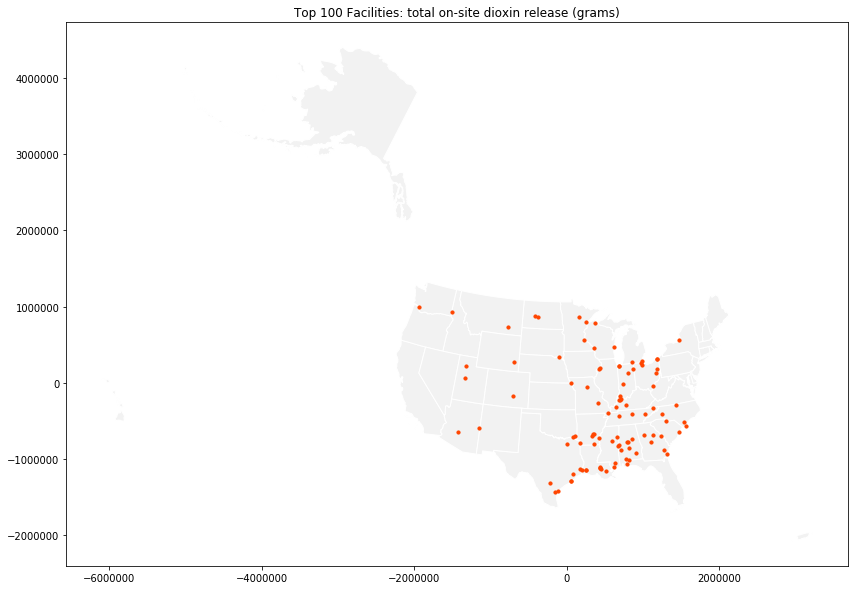

In [175]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_total_dioxins_equal = tri_total_dioxins.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_total_dioxins_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: total on-site dioxin release (grams)');

print

In [176]:
# plot heatmap
m = folium.Map(location=[37, -102], zoom_start=4)

max_amount = float(tri_total_dioxins['ON_SITE_RELEASE_TOTAL_GRAMS'].max())

hm_wide = HeatMap( list(zip(tri_total_dioxins.LATITUDE.values, tri_total_dioxins.LONGITUDE.values, tri_total_dioxins.ON_SITE_RELEASE_TOTAL_GRAMS.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

m.add_child(hm_wide)

m

### Find top facilities based on total lbs of chemicals released into air

In [190]:
tri_total_air = tri.sort_values(by=['AIR_RELEASE_LBS'], ascending=False).head(100)
tri_total_air.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
15760,70346CFNDSHWY30,2018,CF INDUSTRIES NITROGEN LLC,39018 HWY 3089,DONALDSONVILLE,ASCENSION PARISH,LA,70346,,,30.09856,-90.95599,NO,Chemicals,"AMMONIA, NITRATE COMPOUNDS, ZINC COMPOUNDS, FO...",CF INDUSTRIES HOLDINGS INC,nan,nan,nan,nan,nan,nan,nan,2448928.00000,8560330.00000,0.00000,0.00000,11009258.00000,55667.00000,11064925.00000,nan,nan,nan,nan,nan,nan,nan,0.00000,4193.00000,0.00000,0.00000,4193.00000,0.00000,4193.00000,POINT (-90.95599 30.09856)
9779,45620MRCNL7397N,2018,GAVIN POWER LLC,7397 N STATE RT 7,CHESHIRE,GALLIA,OH,45620,,,38.93470,-82.11580,NO,Electric Utilities,"NICKEL and NICKEL COMPOUNDS, MERCURY and MER...",LIGHTSTONE GENERATION LLC,0.00000,9.91000,0.00000,0.00000,9.91000,0.00000,9.91000,20411.58200,5431616.52000,2614884.00000,2614884.00000,8066912.10200,4954.50000,8071866.60200,36.54200,409.20000,96980.00000,96980.00000,97425.74200,9.00000,97434.74200,46.80000,898.00000,172832.00000,172832.00000,173776.80000,0.00000,173776.80000,POINT (-82.11580 38.93470)
16771,74764WYRHSHIGHW,2018,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,MCCURTAIN,OK,74764,,,33.99919,-95.10972,NO,Paper,"NITRATE COMPOUNDS, BARIUM and BARIUM COMPOUND...",INTERNATIONAL PAPER CO,0.00000,0.61400,7.46200,7.46200,8.07600,0.00000,8.07600,105826.12000,5372844.00000,484518.47000,484518.47000,5963188.59000,0.00000,5963188.59000,179.39000,997.00000,1767.00000,1767.00000,2943.39000,0.00000,2943.39000,3736.00000,55238.00000,11126.23000,11126.23000,70100.23000,0.00000,70100.23000,POINT (-95.10972 33.99919)
3945,26366HRRSNRTE20,2018,HARRISON POWER STATION,RT 20,HAYWOOD,HARRISON,WV,26366,,,39.39789,-80.48481,NO,Electric Utilities,"BARIUM COMPOUNDS, SELENIUM COMPOUNDS, ARSENIC ...",FIRSTENERGY CORP,0.00000,2.33000,0.00000,0.00000,2.33000,0.00000,2.33000,3076.10000,5302320.20000,2104526.52000,2104526.52000,7409922.82000,2.18000,7409925.00000,0.00000,500.20000,75453.46000,75453.46000,75953.66000,0.03000,75953.69000,43.00000,658.00000,131309.00000,131309.00000,132010.00000,0.00000,132010.00000,POINT (-80.48481 39.39789)
19054,84074MXMGNROWLE,2018,US MAGNESIUM LLC,12819 N SKULL VALLEY RD,GRANTSVILLE,TOOELE,UT,84029,,,40.91558,-112.73425,NO,Primary Metals,"CHLORINE, DIOXIN AND DIOXIN-LIKE COMPOUNDS, HE...",THE RENCO GROUP INC,0.00000,57.04750,14001.12900,14001.12900,14058.17650,520.00090,14578.17740,0.00000,4997887.44286,2847.68300,2847.68300,5000735.12586,2.97300,5000738.09886,0.00000,111.54286,2847.68300,2847.68300,2959.22586,2.97300,2962.19886,0.00000,50.20286,2509.74300,2509.74300,2559.94586,1.38000,2561.32586,POINT (-112.73425 40.91558)


<function print>

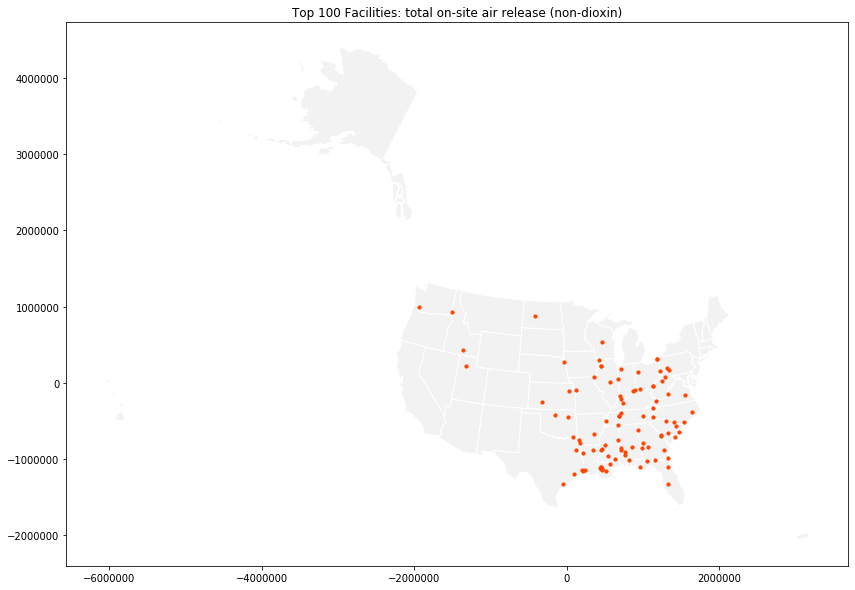

In [179]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_total_air_equal = tri_total_air.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_total_air_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: total on-site air release (non-dioxin)');

print

In [181]:
# plot heatmap
m = folium.Map(location=[37, -102], zoom_start=4)

max_amount = float(tri_total_air['AIR_RELEASE_LBS'].max())

hm_wide = HeatMap( list(zip(tri_total_air.LATITUDE.values, tri_total_air.LONGITUDE.values, tri_total_air.AIR_RELEASE_LBS.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

m.add_child(hm_wide)

m

### Find top facilities based on total lbs of chemicals released by land

In [191]:
tri_total_land = tri.sort_values(by=['LAND_RELEASE_LBS'], ascending=False).head(100)
tri_total_land.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
21553,99752RDDGP90MIL,2018,RED DOG OPERATIONS,90 MILES N OF KOTZEBUE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,99752,,,68.06151,-162.85549,NO,Metal Mining,"LEAD COMPOUNDS, 1,2,4-TRIMETHYLBENZENE, METHAN...",TECK AMERICAN INC,0.00000,0.82870,0.00145,0.00145,0.83015,0.00000,0.83015,6335.80200,212962.44000,885463576.00000,885463576.00000,885682874.24200,0.91000,885682875.15200,2.48200,18234.49000,490874429.00000,490874429.00000,490892665.97200,0.86000,490892666.83200,3.85000,452.06000,2277576.00000,2277576.00000,2278031.91000,0.02000,2278031.93000,POINT (-162.85549 68.06151)
19008,84006KNNCT12300,2018,KENNECOTT UTAH COPPER MINE CONCENTRATORS & POW...,8362 WEST 10200 SOUTH,BINGHAM CANYON,SALT LAKE,UT,84006,,,40.51667,-112.15000,NO,Metal Mining,"LEAD COMPOUNDS, DIOXIN AND DIOXIN-LIKE COMPOUN...",RIO TINTO AMERICA INC,0.00000,0.30287,0.00000,0.00000,0.30287,0.00000,0.30287,3549.00000,5378.96000,229193581.00000,229193581.00000,229202508.96000,27.90000,229202536.86000,21.00000,812.27000,179097806.00000,179097806.00000,179098639.27000,0.00000,179098639.27000,476.00000,83.64000,12924.00000,12924.00000,13483.64000,0.00000,13483.64000,POINT (-112.15000 40.51667)
19611,89414NWMNT35MIL,2018,NEWMONT GOLDCORP TWIN CREEKS MINE,35 MILES NE OF GOLCONDA,GOLCONDA,HUMBOLDT,NV,89414,,,41.25349,-117.16764,NO,Metal Mining,"NICKEL COMPOUNDS, ARSENIC COMPOUNDS, MERCURY C...",NEWMONT GOLDCORP,nan,nan,nan,nan,nan,nan,nan,26530.00000,63896.30000,99685043.70000,99685043.70000,99775470.00000,225.20000,99775695.20000,0.00000,469.30000,5658139.70000,5658139.70000,5658609.00000,225.20000,5658834.20000,163.00000,19.00000,590172.00000,590172.00000,590354.00000,0.00000,590354.00000,POINT (-117.16764 41.25349)
19395,85539BHPCPHWY60,2018,PINTO VALLEY MINE,2911 N FOREST SERVICE RD 287,MIAMI,GILA,AZ,85539,,,33.41745,-110.98421,NO,Metal Mining,"COPPER and COPPER COMPOUNDS, ZINC COMPOUNDS, ...",,nan,nan,nan,nan,nan,nan,nan,0.00000,20121.39816,97135884.00000,97135884.00000,97156005.39816,154.00000,97156159.39816,0.00000,813.69816,10162351.00000,10162351.00000,10163164.69816,154.00000,10163318.69816,0.00000,7398.00000,0.00000,0.00000,7398.00000,0.00000,7398.00000,POINT (-110.98421 33.41745)
21555,99801KNNCT13401,2018,HECLA GREENS CREEK MINING CO,13401 GLACIER HWY,JUNEAU,JUNEAU BOROUGH,AK,99801,,,58.08180,-134.64121,NO,Metal Mining,"1,2,4-TRIMETHYLBENZENE, MANGANESE, CADMIUM COM...",HECLA MINING CO,nan,nan,nan,nan,nan,nan,nan,363.00000,18283.00000,55570951.00000,55570951.00000,55589597.00000,9.00000,55589606.00000,110.00000,109.00000,7031598.00000,7031598.00000,7031817.00000,0.00000,7031817.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,POINT (-134.64121 58.08180)


<function print>

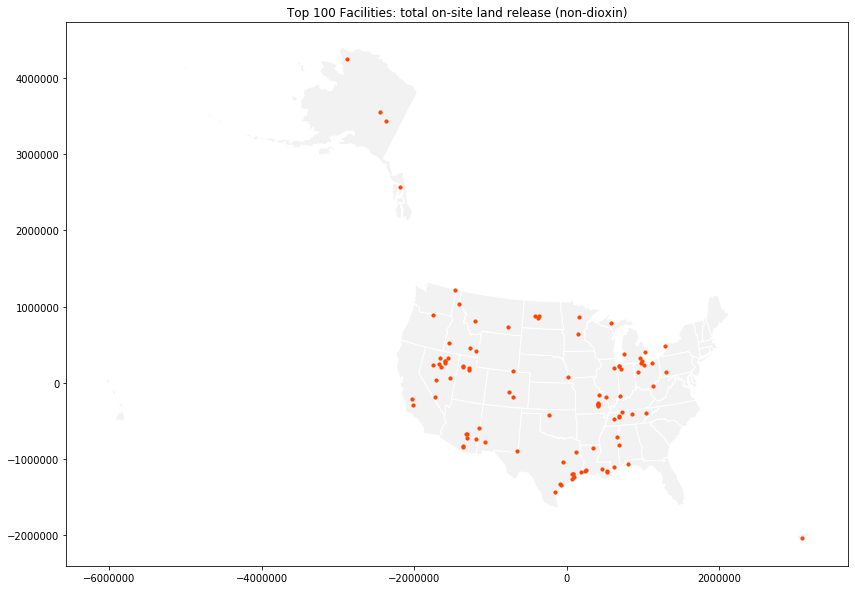

In [183]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
tri_total_land_equal = tri_total_land.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
tri_total_land_equal.plot(ax=ax, color='orangered', zorder=1, markersize=10);



ax.set(
#     xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Top 100 Facilities: total on-site land release (non-dioxin)');

print

In [184]:
# plot heatmap
m = folium.Map(location=[37, -102], zoom_start=4)

max_amount = float(tri_total_land['LAND_RELEASE_LBS'].max())

hm_wide = HeatMap( list(zip(tri_total_land.LATITUDE.values, tri_total_land.LONGITUDE.values, tri_total_land.LAND_RELEASE_LBS.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

m.add_child(hm_wide)

m

## Final output

geojson that will allow me to map the top 100 sites, using a dropdown to change categories and update map